In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

customer_data = pd.read_csv('/Mall_Customers.csv')


In [ ]:
print(customer_data.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


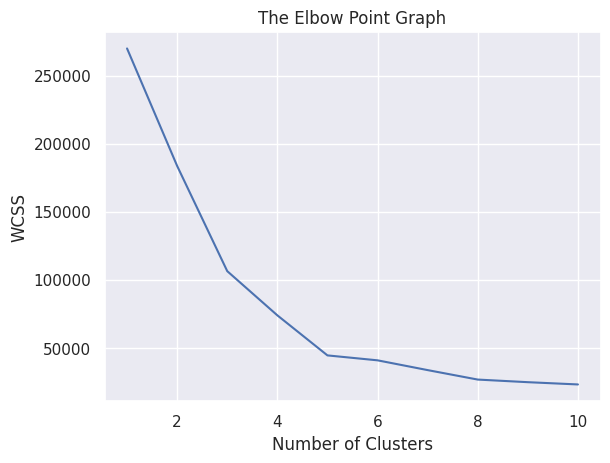

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


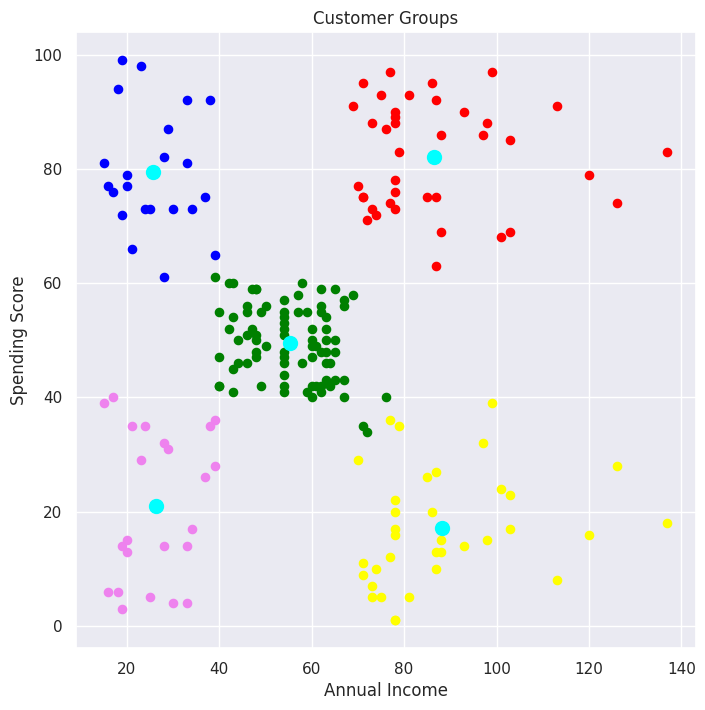

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=35, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=35, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=35, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=35, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=35, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Assuming you have already run KMeans and have 'kmeans', 'X' and 'Y' (cluster labels)

# Function to analyze clusters
def analyze_clusters(kmeans, X, Y):
    cluster_analysis = {}

    # Extract centroids (kmeans.cluster_centers_)
    centroids = kmeans.cluster_centers_

    for i in range(kmeans.n_clusters):
        # Get data points in the current cluster
        cluster_data = X[Y == i]

        # Calculate the average income and spending score for this cluster
        avg_income = np.mean(cluster_data[:, 0])  # x-axis (Annual Income)
        avg_spending_score = np.mean(cluster_data[:, 1])  # y-axis (Spending Score)

        # Cluster description logic based on centroid position and spread of data
        if avg_income < 50 and avg_spending_score < 50:
            description = "Low income, low spending → Budget-conscious customers, possibly younger or at an early stage in their earning capacity."
        elif avg_income > 100 and avg_spending_score > 50:
            description = "High income, high spending → Affluent customers with a significant disposable income who are willing to spend a lot."
        elif avg_income < 50 and avg_spending_score > 50:
            description = "Low income, moderate-to-high spending → Customers with lower income but who still spend considerably on particular items."
        elif avg_income > 100 and avg_spending_score < 50:
            description = "High income, low spending → High-income individuals who are more conservative with their spending. They may be focused on saving or investing."
        else:
            description = "Medium income, medium-to-high spending → Middle-class customers with balanced income and spending habits."

        # Store the analysis in the dictionary
        cluster_analysis[f"Cluster {i+1}"] = {
            "Avg Income": avg_income,
            "Avg Spending Score": avg_spending_score,
            "Description": description
        }

    return cluster_analysis

# Call the function to get cluster analysis
cluster_analysis = analyze_clusters(kmeans, X, Y)

# Example: To output the analysis as a structured dictionary for documentation purposes
for cluster, analysis in cluster_analysis.items():
    print(f"{cluster}:")
    print(f"  Avg Income: {analysis['Avg Income']:.2f}")
    print(f"  Avg Spending Score: {analysis['Avg Spending Score']:.2f}")
    print(f"  Description: {analysis['Description']}")
    print("="*80)


Cluster 1:
  Avg Income: 55.30
  Avg Spending Score: 49.52
  Description: Medium income, medium-to-high spending → Middle-class customers with balanced income and spending habits.
Cluster 2:
  Avg Income: 86.54
  Avg Spending Score: 82.13
  Description: Medium income, medium-to-high spending → Middle-class customers with balanced income and spending habits.
Cluster 3:
  Avg Income: 88.20
  Avg Spending Score: 17.11
  Description: Medium income, medium-to-high spending → Middle-class customers with balanced income and spending habits.
Cluster 4:
  Avg Income: 26.30
  Avg Spending Score: 20.91
  Description: Low income, low spending → Budget-conscious customers, possibly younger or at an early stage in their earning capacity.
Cluster 5:
  Avg Income: 25.73
  Avg Spending Score: 79.36
  Description: Low income, moderate-to-high spending → Customers with lower income but who still spend considerably on particular items.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


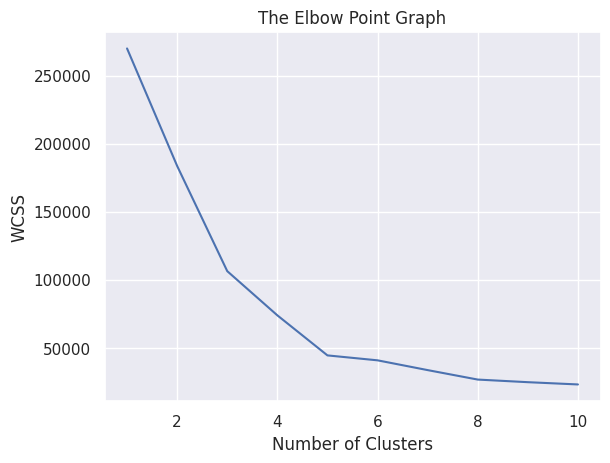


Cluster Labels (Y) for Each Data Point:
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


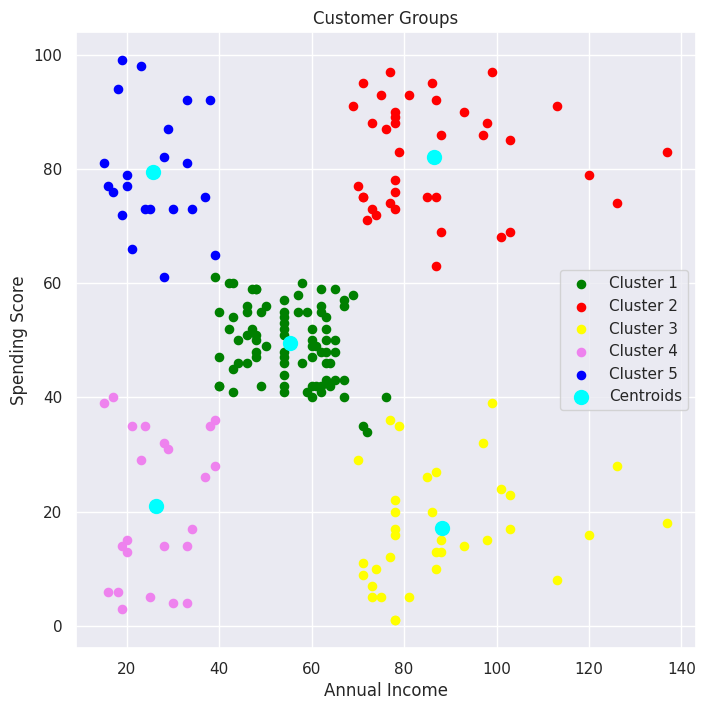


### Cluster Analysis
**Cluster 1:**
  **Avg Income:** 55.30
  **Avg Spending Score:** 49.52
  **Description:** Medium income, medium-to-high spending → Middle-class with balanced habits.
**Cluster 2:**
  **Avg Income:** 86.54
  **Avg Spending Score:** 82.13
  **Description:** Medium income, medium-to-high spending → Middle-class with balanced habits.
**Cluster 3:**
  **Avg Income:** 88.20
  **Avg Spending Score:** 17.11
  **Description:** Medium income, medium-to-high spending → Middle-class with balanced habits.
**Cluster 4:**
  **Avg Income:** 26.30
  **Avg Spending Score:** 20.91
  **Description:** Low income, low spending → Budget-conscious customers.
**Cluster 5:**
  **Avg Income:** 25.73
  **Avg Spending Score:** 79.36
  **Description:** Low income, moderate-to-high spending → Customers spending despite lower income.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st # Removed Streamlit import
from sklearn.cluster import KMeans

# Load and display dataset
customer_data = pd.read_csv('/content/Mall_Customers.csv')

# st.title("Customer Segmentation Using K-Means Clustering") # Removed Streamlit code

# st.write("### Customer Data") # Removed Streamlit code
# st.dataframe(customer_data) # Removed Streamlit code
display(customer_data.head()) # Use display for dataframe

# Select features for clustering
X = customer_data.iloc[:, [3, 4]].values

# Elbow Method to determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Display WCSS Elbow graph
# st.write("### Elbow Point Graph") # Removed Streamlit code
sns.set()
fig, ax = plt.subplots()
ax.plot(range(1, 11), wcss)
ax.set_title('The Elbow Point Graph')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('WCSS')
# st.pyplot(fig) # Removed Streamlit code
plt.show() # Use plt.show() to display the plot in Colab

# Run KMeans with a fixed number of clusters (5 in this case)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

# Display Cluster Labels (Y) as output
# st.write("### Cluster Labels (Y) for Each Data Point:") # Removed Streamlit code
# st.write(Y) # Removed Streamlit code
print("\nCluster Labels (Y) for Each Data Point:") # Use print for array
print(Y) # Use print for array


# Plotting the clusters and their Centroids
# st.write("### Customer Groups Visualization") # Removed Streamlit code

fig2, ax2 = plt.subplots(figsize=(8, 8))

ax2.scatter(X[Y == 0, 0], X[Y == 0, 1], s=35, c='green', label='Cluster 1')
ax2.scatter(X[Y == 1, 0], X[Y == 1, 1], s=35, c='red', label='Cluster 2')
ax2.scatter(X[Y == 2, 0], X[Y == 2, 1], s=35, c='yellow', label='Cluster 3')
ax2.scatter(X[Y == 3, 0], X[Y == 3, 1], s=35, c='violet', label='Cluster 4')
ax2.scatter(X[Y == 4, 0], X[Y == 4, 1], s=35, c='blue', label='Cluster 5')

# Plot the centroids
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

ax2.set_title('Customer Groups')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')
ax2.legend()
# st.pyplot(fig2) # Removed Streamlit code
plt.show() # Use plt.show() to display the plot in Colab


# Function to analyze clusters
def analyze_clusters(kmeans, X, Y):
    cluster_analysis = {}

    for i in range(kmeans.n_clusters):
        cluster_data = X[Y == i]
        avg_income = np.mean(cluster_data[:, 0])  # x-axis (Annual Income)
        avg_spending_score = np.mean(cluster_data[:, 1])  # y-axis (Spending Score)

        if avg_income < 50 and avg_spending_score < 50:
            description = "Low income, low spending → Budget-conscious customers."
        elif avg_income > 100 and avg_spending_score > 50:
            description = "High income, high spending → Affluent customers."
        elif avg_income < 50 and avg_spending_score > 50:
            description = "Low income, moderate-to-high spending → Customers spending despite lower income."
        elif avg_income > 100 and avg_spending_score < 50:
            description = "High income, low spending → High-income, conservative spenders."
        else:
            description = "Medium income, medium-to-high spending → Middle-class with balanced habits."

        cluster_analysis[f"Cluster {i + 1}"] = {
            "Avg Income": avg_income,
            "Avg Spending Score": avg_spending_score,
            "Description": description
        }

    return cluster_analysis

# Call the function and display the analysis
cluster_analysis = analyze_clusters(kmeans, X, Y)

# st.write("### Cluster Analysis") # Removed Streamlit code
print("\n### Cluster Analysis") # Use print for title
for cluster, analysis in cluster_analysis.items():
    # st.write(f"**{cluster}:**") # Removed Streamlit code
    # st.write(f"  **Avg Income:** {analysis['Avg Income']:.2f}") # Removed Streamlit code
    # st.write(f"  **Avg Spending Score:** {analysis['Avg Spending Score']:.2f}") # Removed Streamlit code
    # st.write(f"  **Description:** {analysis['Description']}") # Removed Streamlit code
    # st.write("=" * 80) # Removed Streamlit code
    print(f"**{cluster}:**") # Use print for output
    print(f"  **Avg Income:** {analysis['Avg Income']:.2f}") # Use print for output
    print(f"  **Avg Spending Score:** {analysis['Avg Spending Score']:.2f}") # Use print for output
    print(f"  **Description:** {analysis['Description']}") # Use print for output
    print("=" * 80) # Use print for output

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.cluster import KMeans

# Load and display dataset
customer_data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset using Streamlit
st.title("Customer Segmentation Using K-Means Clustering")

st.write("### Customer Data")
st.dataframe(customer_data.head())

# Select features for clustering
X = customer_data.iloc[:, [3, 4]].values

# Elbow Method to determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Display WCSS Elbow graph using Streamlit's st.pyplot()
st.write("### Elbow Point Graph")
sns.set()
fig, ax = plt.subplots()
ax.plot(range(1, 11), wcss)
ax.set_title('The Elbow Point Graph')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('WCSS')
st.pyplot(fig)

# Run KMeans with a fixed number of clusters (5 in this case)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

# Display Cluster Labels (Y) as output using Streamlit
st.write("### Cluster Labels (Y) for Each Data Point:")
st.write(Y)

# Plotting the clusters and their Centroids
st.write("### Customer Groups Visualization")

fig2, ax2 = plt.subplots(figsize=(8, 8))

ax2.scatter(X[Y == 0, 0], X[Y == 0, 1], s=35, c='green', label='Cluster 1')
ax2.scatter(X[Y == 1, 0], X[Y == 1, 1], s=35, c='red', label='Cluster 2')
ax2.scatter(X[Y == 2, 0], X[Y == 2, 1], s=35, c='yellow', label='Cluster 3')
ax2.scatter(X[Y == 3, 0], X[Y == 3, 1], s=35, c='violet', label='Cluster 4')
ax2.scatter(X[Y == 4, 0], X[Y == 4, 1], s=35, c='blue', label='Cluster 5')

# Plot the centroids
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

ax2.set_title('Customer Groups')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')
ax2.legend()
st.pyplot(fig2)

# Function to analyze clusters
def analyze_clusters(kmeans, X, Y):
    cluster_analysis = {}

    for i in range(kmeans.n_clusters):
        cluster_data = X[Y == i]
        avg_income = np.mean(cluster_data[:, 0])  # x-axis (Annual Income)
        avg_spending_score = np.mean(cluster_data[:, 1])  # y-axis (Spending Score)

        if avg_income < 50 and avg_spending_score < 50:
            description = "Low income, low spending → Budget-conscious customers."
        elif avg_income > 100 and avg_spending_score > 50:
            description = "High income, high spending → Affluent customers."
        elif avg_income < 50 and avg_spending_score > 50:
            description = "Low income, moderate-to-high spending → Customers spending despite lower income."
        elif avg_income > 100 and avg_spending_score < 50:
            description = "High income, low spending → High-income, conservative spenders."
        else:
            description = "Medium income, medium-to-high spending → Middle-class with balanced habits."

        cluster_analysis[f"Cluster {i + 1}"] = {
            "Avg Income": avg_income,
            "Avg Spending Score": avg_spending_score,
            "Description": description
        }

    return cluster_analysis

# Call the function and display the analysis using Streamlit
cluster_analysis = analyze_clusters(kmeans, X, Y)

st.write("### Cluster Analysis")
for cluster, analysis in cluster_analysis.items():
    st.write(f"**{cluster}:**")
    st.write(f"  **Avg Income:** {analysis['Avg Income']:.2f}")
    st.write(f"  **Avg Spending Score:** {analysis['Avg Spending Score']:.2f}")
    st.write(f"  **Description:** {analysis['Description']}")
    st.write("=" * 80)
